<a href="https://colab.research.google.com/github/GauraoM/PyTorch/blob/main/Image_Classification_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

In [2]:
# Download the dataset
dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(dataset_url, '.')

  0%|          | 0/135107811 [00:00<?, ?it/s]

In [3]:
# Extract the file
with tarfile.open("/content/cifar10.tgz","r:gz") as tar:
  tar.extractall(path = ".")

In [4]:
data_dir = "/content/cifar10"

# get the folders
print(os.listdir(data_dir))
# get the folders inside the classes
classes = os.listdir(data_dir + "/train") 
print(classes)

['test', 'train']
['deer', 'truck', 'cat', 'frog', 'airplane', 'dog', 'automobile', 'ship', 'bird', 'horse']


In [5]:
# Printing files from folder
airplane_files = os.listdir(data_dir + "/train/airplane")
print("No. of planes:", len(airplane_files))
print(airplane_files[:5]) 

No. of planes: 5000
['0157.png', '4222.png', '0730.png', '3399.png', '0061.png']


In [6]:
ship_test_files = os.listdir(data_dir + "/test/ship")
print("No. of planes:", len(ship_test_files))
print(ship_test_files[:5]) 

No. of planes: 1000
['0157.png', '0730.png', '0061.png', '0640.png', '0345.png']


In [7]:
## ImageFolder class from torchvision to load the dataset as pytorch tensor
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [8]:
dataset = ImageFolder(data_dir + "/train", transform=ToTensor())

##### Each element is a tuple, containing a image tensor and a label. Since the data consists of 32x32 px color images with 3 channels (RGB), each image tensor has the shape (3, 32, 32)

In [9]:
img, label = dataset[0]
print(img.shape, label)
img

torch.Size([3, 32, 32]) 0


tensor([[[0.7922, 0.7922, 0.8000,  ..., 0.8118, 0.8039, 0.7961],
         [0.8078, 0.8078, 0.8118,  ..., 0.8235, 0.8157, 0.8078],
         [0.8235, 0.8275, 0.8314,  ..., 0.8392, 0.8314, 0.8235],
         ...,
         [0.8549, 0.8235, 0.7608,  ..., 0.9529, 0.9569, 0.9529],
         [0.8588, 0.8510, 0.8471,  ..., 0.9451, 0.9451, 0.9451],
         [0.8510, 0.8471, 0.8510,  ..., 0.9373, 0.9373, 0.9412]],

        [[0.8000, 0.8000, 0.8078,  ..., 0.8157, 0.8078, 0.8000],
         [0.8157, 0.8157, 0.8196,  ..., 0.8275, 0.8196, 0.8118],
         [0.8314, 0.8353, 0.8392,  ..., 0.8392, 0.8353, 0.8275],
         ...,
         [0.8510, 0.8196, 0.7608,  ..., 0.9490, 0.9490, 0.9529],
         [0.8549, 0.8471, 0.8471,  ..., 0.9412, 0.9412, 0.9412],
         [0.8471, 0.8431, 0.8471,  ..., 0.9333, 0.9333, 0.9333]],

        [[0.7804, 0.7804, 0.7882,  ..., 0.7843, 0.7804, 0.7765],
         [0.7961, 0.7961, 0.8000,  ..., 0.8039, 0.7961, 0.7882],
         [0.8118, 0.8157, 0.8235,  ..., 0.8235, 0.8157, 0.

In [10]:
# Printing Classes
print(dataset.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_example(img, label):
  print('Label:', dataset.classes[label], "("+str(label)+")")
  plt.imshow(img.permute(1, 2, 0)) # Move 1--->0,2--->1,0--->2

Label: airplane (0)


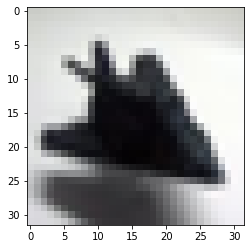

In [ ]:
show_example(*dataset[0])

In [12]:
import numpy as np

# Pick 20%  random for validation set
def split_indices(n, val_pct=0.1, seed=99):
  # Determine the size of validation set'
  n_val = int(val_pct*n)
  # for reproducibility
  np.random.seed(seed)
  # Create random permutation of 0 - n-1
  idxs = np.random.permutation(n)
  # Pick 1st n_val indices for validation_set
  return idxs[n_val:], idxs[:n_val]

In [13]:
val_pct = 0.2
rand_seed = 42

train_indices, val_indices = split_indices(len(dataset), val_pct, rand_seed)
print(len(train_indices)) , print(len(val_indices))

print("sample validation_indices", val_indices[:10])

40000
10000
sample validation_indices [33553  9427   199 12447 39489 42724 10822 49498  4144 36958]


In [14]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [15]:
## Divides the data into the given batch size  

batch_size = 100

# Training Sampler and data loader
train_sampler = SubsetRandomSampler(train_indices) # Helps to randomize the batches, shffle the  data
train_dl = DataLoader(dataset, batch_size, sampler=train_sampler)

# Validation Sampler and data loader
valid_sampler = SubsetRandomSampler(val_indices)
valid_dl = DataLoader(dataset, batch_size, sampler=valid_sampler)

In [16]:
from torchvision.utils import make_grid

def show_batch(dl):
  for images, labels in dl:
    fig, ax = plt.subplots(figsize =(10,10))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images,10).permute(1,2,0))


In [17]:
import torch.nn.functional as F
import torch.nn as nn

In [18]:
# Simple convolutional model
simple_model = nn.Sequential(
    nn.Conv2d(3, 8, kernel_size=3, stride=1, padding=1),
    nn.MaxPool2d(2,2)
)

In [19]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = simple_model(images)
    print('out.shape:', out.shape)
    break

images.shape: torch.Size([100, 3, 32, 32])
out.shape: torch.Size([100, 8, 16, 16])


In [20]:
model = nn.Sequential(
    nn.Conv2d(3 ,16, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2), #output:bs*16*16*16

    nn.Conv2d(16 ,16, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2), #output:bs*16*8*8

    nn.Conv2d(16 ,16, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2), #output:bs*16*4*4

    nn.Conv2d(16 ,16, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2), #output:bs*16*2*2

    nn.Conv2d(16 ,16, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2), #output:bs*16*1*1

    nn.Flatten(), #output:bs*16
    nn.Linear(16,10) #output: bs*10


)

In [21]:
model[3].weight.shape

torch.Size([16, 16, 3, 3])

In [22]:
# Check the models output
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

images.shape: torch.Size([100, 3, 32, 32])
out.shape: torch.Size([100, 10])
out[0]: tensor([ 0.1330, -0.0480,  0.1382,  0.0392,  0.1099, -0.0751,  0.0808,  0.0739,
        -0.1633, -0.2239], grad_fn=<SelectBackward0>)


In [23]:
# Helper function if our code uses GPU else CPU
def get_default_device():
  if torch.cuda.is_available():
     return torch.device("cuda")
  else:
     return torch.device("cpu")

## Move the data and model to chosen device
def to_device(data, device):
  """Move tensor to chosen device"""
  if isinstance(data, (list, tuple)): #Checks whether it is list or tuple 
    return [to_device(x, device) for x in data] # move to device
  return data.to(device, non_blocking=True)

# DeviceDataLoader class to wrap our existing data loaders and move batches of data to the selected device.
class DeviceDataLoader():
  """Wrap a dataloader to move data to a device"""
  def __init__(self,dl,device):
    self.dl =dl
    self.device = device
    
  def __iter__(self):
    """Yield a batch of data after moving it to device"""
    for b in self.dl:
      yield to_device(b, self.device)

  def __len__(self):
    """Number of batches"""
    return (self.dl)

In [24]:
device = get_default_device()
device

device(type='cuda')

##### Training and validation data loaders using DeviceDataLoader for automatically transferring batches of data to the GPU (if available), and use to_device to move our model to the GPU (if available).

In [25]:
## Load the data using device loader

train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

to_device(model, device)

Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU()
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (9): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (10): ReLU()
  (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (12): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU()
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15): Flatten(start_dim=1, end_dim=-1)
  (16): Linear(in_features=16, out_features=10, bias=True)
)

#### Training The Model

In [26]:
def loss_batch(model, loss_func, xb, yb, opt= None, metric=None):
  # Generate Predictions
  preds = model(xb)
  # Calculate loss
  loss = loss_func(preds, yb)
  if opt is not None:
    # Compute the gradient
    loss.backward()
    # Update Parameters
    opt.step()
    # Reset gradient
    opt.zero_grad()

  metric_result = None
  if metric is not None:
    # Compute the metric
    metric_result = metric(preds, yb)

  return loss.item(), len(xb), metric_result

In [27]:
#Evaluate function
def evaluate(model, loss_fn, valid_dl, metric=None):
   with torch.no_grad():
      #pass each batch through the model
      results = [loss_batch(model, loss_fn, xb, yb, metric=metric) for xb, yb in valid_dl]

      # Seperate losses, count, metrics
      losses, nums, metrics = zip(*results)
      # Toatl size of the dataset
      total = np.sum(nums)
      # Average loss across batches
      avg_loss = np.sum(np.multiply(losses, nums)) / total
      avg_metric = None

      if metric is not None:
          # Average of metric across batches
          avg_metric = np.sum(np.multiply(metrics, nums)) / total 

   return avg_loss, total, avg_metric

In [28]:
# Fitting the model
def fit(epochs, model, loss_fn, train_dl, valid_dl, opt_fn=None, lr = None, metric=None, ):

  train_losses, val_losses, val_metrics =[], [], []
  # Instantiate the optimizer
  if opt_fn is None: opt_fn = torch.optim.SGD
  opt = opt_fn(model.parameters(), lr=lr)

  for epoch in range(epochs):
    #Training mode
    model.train()

    for xb, yb in train_dl:
      train_loss,_,_ = loss_batch(model, loss_fn, xb ,yb, opt)

    # Evaluation mode
    result = evaluate(model, loss_fn, valid_dl, metric)
    val_loss, total, val_metric = result

    # Record the losses and metric
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    val_metrics.append(val_metric)

    #print progress
    if metric is None:
        print('Epoch[{}/{}], train_loss:{:.4f}, val_loss:{:.4f}'.format(epoch+1, epochs,train_loss, val_loss))
    else:
        print('Epoch[{}/{}], train_loss:{:.4f},val_loss:{:.4f}, val_{}:{:.4f}'.format(epoch+1, epochs, train_loss, val_loss, metric.__name__,val_metric)) 

  return train_losses, val_losses, val_metrics

In [29]:
# Compares the ouput and label gives how accurate our model
def accuracy(outputs, labels):
  _, preds = torch.max(outputs, dim=1)
  return torch.sum(preds == labels).item() / len(preds)

#### Train the model and see the performance on the validationset with initial set of parameters

In [30]:
val_loss, _, val_acc = evaluate(model, F.cross_entropy, valid_dl, metric=accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(val_loss, val_acc))

Loss: 2.3094, Accuracy: 0.0980


##### Hyperparameters to train the model

In [31]:
num_epochs = 10
opt_fn = torch.optim.Adam
lr = 0.005

In [32]:
history = fit(num_epochs, model, F.cross_entropy, train_dl, valid_dl, opt_fn, lr, accuracy)
train_losses, val_losses, val_metrics = history

Epoch[1/10], train_loss:1.4926,val_loss:1.6384, val_accuracy:0.3915
Epoch[2/10], train_loss:1.6138,val_loss:1.5496, val_accuracy:0.4287
Epoch[3/10], train_loss:1.4122,val_loss:1.4676, val_accuracy:0.4635
Epoch[4/10], train_loss:1.2254,val_loss:1.4181, val_accuracy:0.4826
Epoch[5/10], train_loss:1.1086,val_loss:1.3832, val_accuracy:0.5012
Epoch[6/10], train_loss:1.2513,val_loss:1.3598, val_accuracy:0.5096
Epoch[7/10], train_loss:1.2172,val_loss:1.3890, val_accuracy:0.5043
Epoch[8/10], train_loss:1.3521,val_loss:1.3006, val_accuracy:0.5367
Epoch[9/10], train_loss:1.2997,val_loss:1.3037, val_accuracy:0.5337
Epoch[10/10], train_loss:1.1241,val_loss:1.3180, val_accuracy:0.5304


In [35]:
# plot metric values in line graph
def plot_metric(metric_values):
  plt.plot(metric_values,'-x')
  plt.xlabel("epochs")
  plt.ylabel("accuracy")
  plt.title("Accuarcy Vs No. of Epochs");

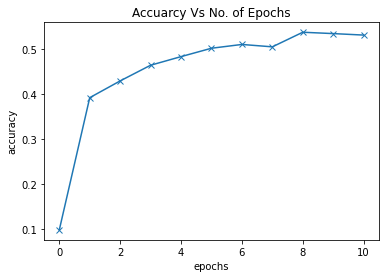

In [36]:
# padding initial validation accuracy with what we got after training
plot_metric([val_acc] + val_metrics)

In [37]:
# Plotting training and validation loss to study the trend
def plot_losses(train_losses, val_losses):
  plt.plot(train_losses,'-x')
  plt.plot(val_losses,'-o')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['Training','Validation'])
  plt.title('Loss vs No.of epochs')

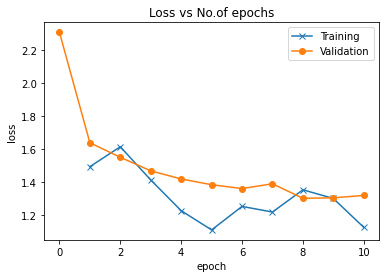

In [38]:
plot_losses([None]+train_losses, [val_loss]+val_losses)